<a href="https://colab.research.google.com/github/forganar/project_section1/blob/main/AI_03_%EA%B9%80%EB%AF%BC%EA%B8%B0_section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

In [ ]:
# 데이터 불러오기

df = pd.read_csv('https://docs.google.com/uc?export=download&id=1biQXiqMe8PyQnN-FB2CpNSbxJ188GOH9', index_col = 0)
df = df.dropna() # 결측치 드랍

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 출고량 단위통일 - M

df.NA_Sales = (df.NA_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
           df.NA_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
             .fillna(1)
             .replace(['K','M'], [10**-3, 1]).astype(float))
df.EU_Sales = (df.EU_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
           df.EU_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
             .fillna(1)
             .replace(['K','M'], [10**-3, 1]).astype(float))
df.JP_Sales = (df.JP_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
           df.JP_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
             .fillna(1)
             .replace(['K','M'], [10**-3, 1]).astype(float))
df.Other_Sales = (df.Other_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * \
           df.Other_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False)
             .fillna(1)
             .replace(['K','M'], [10**-3, 1]).astype(float))

In [ ]:
# 연도 통일

df['Year'] = df['Year'].astype(int)
df.Year[df.Year < 100] = df.Year[df.Year < 100] + 1900
df.Year[df.Year < 1950] = df.Year[df.Year < 1950] + 100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# 지역에 따라서 선호하는 게임 장르가 다를까?
# 지역별 가장 선호하는 장르?
# 지역별 가장 기피하는 장르?

grouped = df.groupby(by=['Genre'], as_index=False).sum()
#grouped = grouped0.set_index('Year')
print(grouped)

NA_G_P = grouped[grouped['NA_Sales'] == grouped['NA_Sales'].max()].Genre # 북미 지역 선호 장르
NA_G_A = grouped[grouped['NA_Sales'] == grouped['NA_Sales'].min()].Genre # 북미 지역 기피 장르

EU_G_P = grouped[grouped['EU_Sales'] == grouped['EU_Sales'].max()].Genre # 유럽 지역 선호 장르
EU_G_A = grouped[grouped['EU_Sales'] == grouped['EU_Sales'].min()].Genre # 유럽 지역 기피 장르

JP_G_P = grouped[grouped['JP_Sales'] == grouped['JP_Sales'].max()].Genre # 일본 지역 선호 장르
JP_G_A = grouped[grouped['JP_Sales'] == grouped['JP_Sales'].min()].Genre # 일본 지역 기피 장르

Other_G_P = grouped[grouped['Other_Sales'] == grouped['Other_Sales'].max()].Genre # 기타 지역 선호 장르
Other_G_A = grouped[grouped['Other_Sales'] == grouped['Other_Sales'].min()].Genre # 기타 지역 기피 장르

print('북미 지역 선호 장르: ',NA_G_P)
# print('북미 지역 기피 장르: ',NA_G_A)
print('유럽 지역 선호 장르: ',EU_G_P)
#print('유럽 지역 기피 장르: ',EU_G_A)
print('일본 지역 선호 장르: ',JP_G_P)
#print('일본 지역 기피 장르: ',JP_G_A)
print('기타 지역 선호 장르: ',Other_G_P)
#print('기타 지역 기피 장르: ',Other_G_A)




           Genre     Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales    Sales
0         Action  6505617    858.75    513.64    156.60       183.99  1712.98
1      Adventure  2546304    101.79     63.66     51.87        16.70   234.02
2       Fighting  1673860    220.35     99.90     87.14        36.15   443.54
3           Misc  3374273    394.73    208.15    104.18        72.64   779.70
4       Platform  1749321    445.38    200.63    130.53        51.45   827.99
5         Puzzle  1134959    121.58     50.47     56.24        12.44   240.73
6         Racing  2443902    354.70    235.02     56.32        76.51   722.55
7   Role-Playing  2940339    318.76    183.09    342.93        56.73   901.51
8        Shooter  2567579    574.48    310.23     38.18       101.86  1024.75
9     Simulation  1697540    181.43    112.99     63.54        31.32   389.28
10        Sports  4610619    667.26    370.97    134.76       132.35  1305.34
11      Strategy  1341739     67.83     44.82     49.10        1

NA:  19.9 %
EU:  21.5 %
JP:  12.3 %
Other:  23.5 %


북미지역과 유럽지역의 차이:  1.6 %
북미지역과 일본지역의 차이:  7.6 %
북미지역과 기타지역의 차이:  3.6 %
유럽지역과 일본지역의 차이:  9.2 %
유럽지역과 기타지역의 차이:  2.0 %
일본지역과 기타지역의 차이:  11.2 %





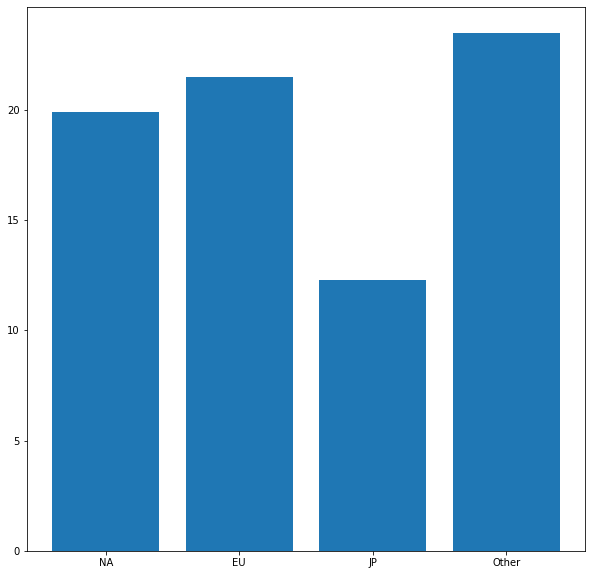

In [ ]:
# 지역에 따라 선호하는 장르가 다를까?

NA_Sales_Action_Rate = grouped['NA_Sales'][0] / grouped['NA_Sales'].sum()
EU_Sales_Action_Rate = grouped['EU_Sales'][0] / grouped['EU_Sales'].sum()
JP_Sales_Action_Rate = grouped['JP_Sales'][0] / grouped['JP_Sales'].sum()
Other_Sales_Action_Rate = grouped['Other_Sales'][0] / grouped['Other_Sales'].sum()

s1 = round(NA_Sales_Action_Rate*100, 1)
s2 = round(EU_Sales_Action_Rate*100, 1)
s3 = round(JP_Sales_Action_Rate*100, 1)
s4 = round(Other_Sales_Action_Rate*100, 1)

print('NA: ',s1,'%')
print('EU: ',s2,'%')
print('JP: ',s3,'%')
print('Other: ',s4,'%')


print('\n')

print('북미지역과 유럽지역의 차이: ',round(abs(s1 - s2),1),'%')
print('북미지역과 일본지역의 차이: ',round(abs(s1 - s3),1),'%')
print('북미지역과 기타지역의 차이: ',round(abs(s1 - s4),1),'%')
print('유럽지역과 일본지역의 차이: ',round(abs(s2 - s3),1),'%')
print('유럽지역과 기타지역의 차이: ',round(abs(s2 - s4),1),'%')
print('일본지역과 기타지역의 차이: ',round(abs(s3 - s4),1),'%')
print('\n\n')

x = np.arange(4)
Action_Rate = ['NA', 'EU', 'JP', 'Other']
values = [s1, s2, s3, s4]

plt.bar(x, values)
plt.xticks(x, Action_Rate)
plt.show()

In [ ]:
# 연도별 게임의 트렌드가 있을까? 데이터전처리

pd.set_option('display.max_row', 400)
pd.set_option('display.max_columns', 400)
df1 = df.groupby(by=['Year', 'Genre'], as_index=False).sum()
bins = list(range(1980, 2031, 10))
bins_label = [str(x)+'s' for x in bins]
bins_label
df['Decade'] = pd.cut(df['Year'], bins, right=False, labels=bins_label[:-1])
df1 = df.drop(columns=['Year'])
df1 = df1.groupby(by=['Decade', 'Genre'], as_index=False).sum()
df1 = df1.dropna()
df_1980 = df1.loc[[0,1,2,3,4,5,6,7,8,9,10]]
df_1990 = df1.loc[[12,13,14,15,16,17,18,19,20,21,22,23]]
df_2000 = df1.loc[[24,25,26,27,28,29,30,31,32,33,34,35]]
df_2010 = df1.loc[[36,37,38,39,40,41,42,43,44,45,46,47]]
df_2020 = df1.loc[[57]]

In [ ]:
#@title
# 1980년대 장르별 출고량

df_1980['Sales'] = df_1980['NA_Sales']+df_1980['EU_Sales']+df_1980['JP_Sales']+df_1980['Other_Sales']
df_1980 = df_1980.sort_values(by='Sales' ,ascending=False)
df_1980 = df_1980[['Decade','Genre','Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
print('1980년대 장르별 출고량')
df_1980

1980년대 장르별 출고량


,Decade,Genre,Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4,1980s,Platform,122.26,74.34,13.24,32.45,2.23
5,1980s,Puzzle,62.75,43.69,5.43,12.47,1.16
8,1980s,Shooter,59.77,50.84,2.83,5.30,0.80
0,1980s,Action,51.10,37.90,4.29,8.31,0.60
10,1980s,Sports,31.78,10.69,2.54,18.20,0.35
7,1980s,Role-Playing,15.25,1.06,0.00,12.68,1.51
6,1980s,Racing,12.10,6.82,1.36,3.69,0.23
3,1980s,Misc,8.44,3.35,0.20,4.86,0.03
2,1980s,Fighting,7.24,3.52,0.69,2.92,0.11
1,1980s,Adventure,4.78,2.57,0.52,1.61,0.08


In [ ]:
#@title
# 1990년대 장르별 출고량

df_1990['Sales'] = df_1990['NA_Sales']+df_1990['EU_Sales']+df_1990['JP_Sales']+df_1990['Other_Sales']
df_1990 = df_1990.sort_values(by='Sales' ,ascending=False)
df_1990 = df_1990[['Decade','Genre','Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
print('1990년대 장르별 출고량')
df_1990

1990년대 장르별 출고량


,Decade,Genre,Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16,1990s,Platform,208.87,112.55,46.15,42.99,7.18
19,1990s,Role-Playing,182.77,46.06,32.13,98.31,6.27
18,1990s,Racing,148.81,77.05,40.62,24.91,6.23
22,1990s,Sports,146.47,70.66,29.18,40.85,5.78
12,1990s,Action,139.15,72.94,40.08,19.60,6.53
14,1990s,Fighting,123.51,56.21,23.80,39.47,4.03
20,1990s,Shooter,68.89,38.76,17.67,10.10,2.36
15,1990s,Misc,63.43,30.89,13.68,16.73,2.13
23,1990s,Strategy,57.51,21.67,12.24,21.59,2.01
21,1990s,Simulation,52.04,17.81,8.58,23.48,2.17


In [ ]:
#@title
# 2000년대 장르별 출고량

df_2000['Sales'] = df_2000['NA_Sales']+df_2000['EU_Sales']+df_2000['JP_Sales']+df_2000['Other_Sales']
df_2000 = df_2000.sort_values(by='Sales' ,ascending=False)
df_2000 = df_2000[['Decade','Genre','Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
print('2000년대 장르별 출고량')
df_2000

2000년대 장르별 출고량


,Decade,Genre,Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
24,2000s,Action,853.13,461.51,234.28,58.31,99.03
34,2000s,Sports,802.81,431.88,223.62,60.37,86.94
27,2000s,Misc,478.53,237.26,129.85,61.14,50.28
30,2000s,Racing,438.00,225.21,137.53,21.07,54.19
32,2000s,Shooter,433.45,257.25,123.29,9.24,43.67
31,2000s,Role-Playing,412.20,169.24,81.26,135.84,25.86
28,2000s,Platform,376.13,203.02,102.57,39.34,31.20
33,2000s,Simulation,265.64,136.51,79.14,26.86,23.13
26,2000s,Fighting,231.26,122.06,54.64,31.00,23.56
25,2000s,Adventure,123.59,61.77,30.89,21.67,9.26


In [ ]:
#@title
# 2010년대 장르별 출고량

df_2010['Sales'] = df_2010['NA_Sales']+df_2010['EU_Sales']+df_2010['JP_Sales']+df_2010['Other_Sales']
df_2010 = df_2010.sort_values(by='Sales' ,ascending=False)
df_2010 = df_2010[['Decade','Genre','Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
print('2010년대 장르별 출고량')
df_2010

2010년대 장르별 출고량


,Decade,Genre,Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
36,2010s,Action,669.60,286.40,234.99,70.38,77.83
44,2010s,Shooter,462.64,227.63,166.44,13.54,55.03
46,2010s,Sports,324.28,154.03,115.63,15.34,39.28
43,2010s,Role-Playing,291.29,102.40,69.70,96.10,23.09
39,2010s,Misc,229.30,123.23,64.42,21.45,20.20
42,2010s,Racing,123.64,45.62,55.51,6.65,15.86
40,2010s,Platform,120.73,55.47,38.67,15.75,10.84
38,2010s,Fighting,81.53,38.56,20.77,13.75,8.45
45,2010s,Simulation,70.80,26.42,25.20,13.20,5.98
37,2010s,Adventure,60.85,20.64,19.07,15.30,5.84


In [ ]:
#@title
# 2020년대 장르별 출고량

df_2020['Sales'] = df_2020['NA_Sales']+df_2020['EU_Sales']+df_2020['JP_Sales']+df_2020['Other_Sales']
df_2020 = df_2020.sort_values(by='Sales' ,ascending=False)
df_2020 = df_2020[['Decade','Genre','Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
print('2020년대 장르별 출고량')
df_2020

2020년대 장르별 출고량


,Decade,Genre,Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
57,2020s,Simulation,0.29,0.27,0.0,0.0,0.02


In [ ]:
#@title
# 연도별 출고량합계에 따른 장르 순위

a_1980 = np.array(df_1980['Genre'])
a_1990 = np.array(df_1990['Genre'])
a_2000 = np.array(df_2000['Genre'])
a_2010 = np.array(df_2010['Genre'])
a_2020 = np.array(df_2020['Genre'])

df_a_1980 = pd.DataFrame(a_1980, index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], columns=['1980'])
df_a_1990 = pd.DataFrame(a_1990, index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12'], columns=['1990'])
df_a_2000 = pd.DataFrame(a_2000, index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12'], columns=['2000'])
df_a_2010 = pd.DataFrame(a_2010, index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12'], columns=['2010'])
df_a_2020 = pd.DataFrame(a_2020, index=['1'], columns=['2020'])

df_Genre = pd.concat([df_a_1980,df_a_1990,df_a_2000,df_a_2010,df_a_2020], axis = 1)
df_Genre.fillna('', inplace=True)
print('연도별 출고량합계에 따른 장르 순위')
df_Genre


연도별 출고량합계에 따른 장르 순위


,1980,1990,2000,2010,2020
1,Platform,Platform,Action,Action,Simulation
2,Puzzle,Role-Playing,Sports,Shooter,
3,Shooter,Racing,Misc,Sports,
4,Action,Sports,Racing,Role-Playing,
5,Sports,Action,Shooter,Misc,
6,Role-Playing,Fighting,Role-Playing,Racing,
7,Racing,Shooter,Platform,Platform,
8,Misc,Misc,Simulation,Fighting,
9,Fighting,Strategy,Fighting,Simulation,
10,Adventure,Simulation,Adventure,Adventure,


In [ ]:
# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
df_3 = df
df_3['Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df_3 = df_3[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Sales', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Decade']]
# 플랫폼별 출고량
# 연도별 출고량
# 장르별 출고량
# 제작사별 출고량

In [ ]:
#@title
# 플랫폼별 출고량

df_4 = df_3.groupby(by=['Platform'], as_index=False).sum()
df_4 = df_4.drop(columns=['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
df_4 = df_4.sort_values(by='Sales' ,ascending=False)
print('플랫폼별 출고량')
df_4

플랫폼별 출고량


,Platform,Sales
16,PS2,1222.44
28,X360,968.59
17,PS3,946.74
26,Wii,900.15
4,DS,817.19
15,PS,725.16
6,GBA,304.76
19,PSP,290.84
18,PS4,275.78
5,GB,254.43


In [ ]:
#@title
# 연도별 출고량

df_5 = df_3.groupby(by=['Year'], as_index=False).sum()
df_5 = df_5.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
df_5 = df_5.sort_values(by='Sales' ,ascending=False)
print('연도별 출고량')
df_5

연도별 출고량


,Year,Sales
28,2008,676.41
29,2009,665.84
27,2007,608.60
30,2010,591.15
31,2011,514.85
26,2006,514.50
25,2005,457.12
24,2004,408.83
22,2002,394.07
32,2012,362.06


In [ ]:
#@title
# 장르별 출고량

df_6 = df_3.groupby(by=['Genre'], as_index=False).sum()
df_6 = df_6.drop(columns=['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
df_6 = df_6.sort_values(by='Sales' ,ascending=False)
print('장르별 출고량')
df_6

장르별 출고량


,Genre,Sales
0,Action,1712.98
10,Sports,1305.34
8,Shooter,1024.75
7,Role-Playing,901.51
4,Platform,827.99
3,Misc,779.70
6,Racing,722.55
2,Fighting,443.54
9,Simulation,389.28
5,Puzzle,240.73


In [ ]:
#@title
# 제작사별 출고량

df_7 = df_3.groupby(by=['Publisher'], as_index=False).sum()
df_7 = df_7.drop(columns=['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
df_7 = df_7.sort_values(by='Sales' ,ascending=False)
print('제작사별 출고량')
df_7.head(20)

제작사별 출고량


,Publisher,Sales
358,Nintendo,1759.58
138,Electronic Arts,1087.18
21,Activision,719.36
454,Sony Computer Entertainment,603.58
523,Ubisoft,472.70
492,Take-Two Interactive,398.57
486,THQ,340.18
274,Konami Digital Entertainment,277.89
444,Sega,269.56
346,Namco Bandai Games,252.80


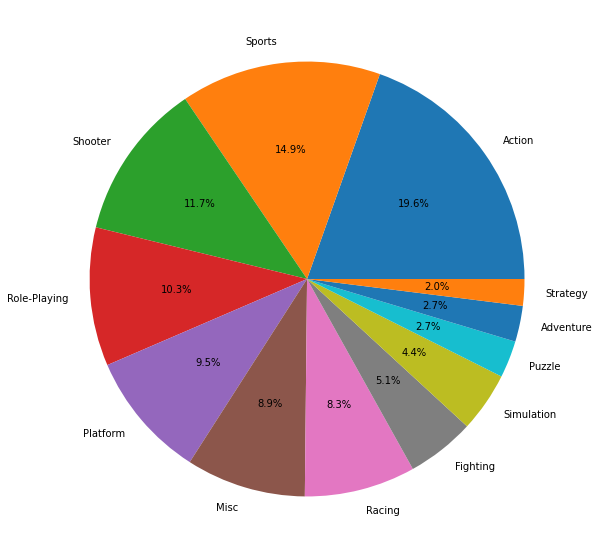

In [ ]:
# 플랫폼별 출고량, 연도별 출고량, 제작사별 출고량은 큰 의미가 없다고 판단
# 장르별 출고량 시각화 - 파이차트

plt.pie(df_6['Sales'], labels = df_6['Genre'], autopct='%0.1f%%')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()



([<matplotlib.patches.Wedge at 0x7f4bcceaf390>,
 [Text(1.0900049694781198, 0.14794987838117157, '1980'),
  Text(0.8216110974213482, 0.7314063197663034, '1990'),
  Text(-1.0503399004586143, 0.3267814154822585, '2000'),
  Text(0.688755322002908, -0.8576806552631758, '2010'),
  Text(1.0999999940292349, -0.00011461100808694216, '2020')],
 [Text(0.5945481651698834, 0.08069993366245722, '4.3%'),
  Text(0.4481515076843717, 0.3989489016907109, '14.6%'),
  Text(-0.5729126729774259, 0.17824440844486825, '52.7%'),
  Text(0.37568472109249523, -0.46782581196173223, '28.5%'),
  Text(0.599999996743219, -6.251509532015026e-05, '0.0%')])

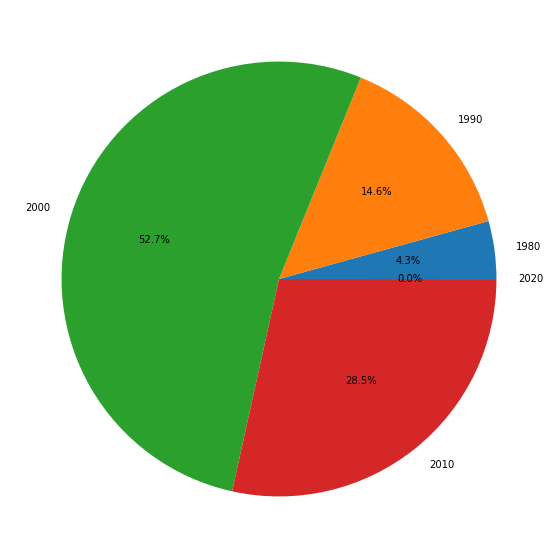

In [ ]:
# 연도별 출고량(전체 게임시장의 흐름)

df_1980['Sales'].sum()
df_1990['Sales'].sum()
df_2000['Sales'].sum()
df_2010['Sales'].sum()
df_2020['Sales'].sum()
Year = [1980, 1990, 2000, 2010, 2020]
Sales = [df_1980['Sales'].sum(),df_1990['Sales'].sum(),df_2000['Sales'].sum(),df_2010['Sales'].sum(),df_2020['Sales'].sum()]
plt.pie(Sales, labels = Year, autopct='%0.1f%%')

1980년대 총 출고량:  375.97999999999996
1990년대 총 출고량:  1275.19
2000년대 총 출고량:  4612.420000000001
2010년대 총 출고량:  2491.4900000000002
2020년대 총 출고량:  0.29000000000000004


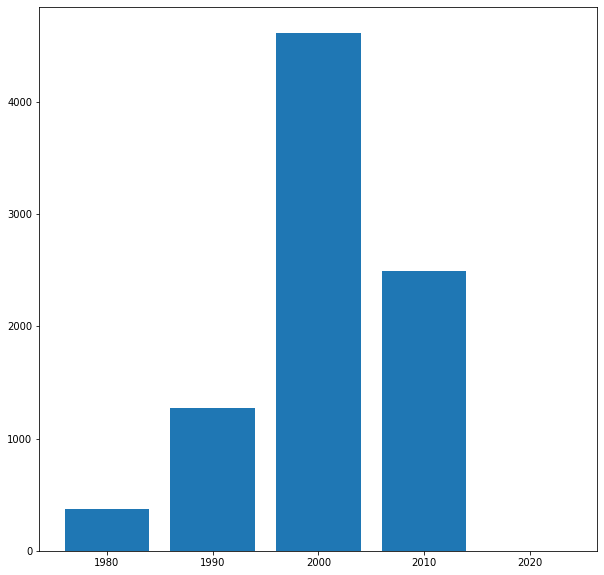

In [ ]:
y = np.arange(5)
Year_s = ['1980', '1990', '2000', '2010', '2020']
values_a = [Sales[0], Sales[1], Sales[2], Sales[3], Sales[4]]
print('1980년대 총 출고량: ', df_1980['Sales'].sum())
print('1990년대 총 출고량: ', df_1990['Sales'].sum())
print('2000년대 총 출고량: ', df_2000['Sales'].sum())
print('2010년대 총 출고량: ', df_2010['Sales'].sum())
print('2020년대 총 출고량: ', df_2020['Sales'].sum())
plt.bar(y, values_a)
plt.xticks(y, Year)
plt.show()